# IMDB dataset sentiment analysis

Dataset can be found here:https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr

Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/drive/MyDrive/imdb-reviews-pt-br.csv')

In [4]:
data.shape

(49459, 4)

In [5]:
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [6]:
#Checando quantidade de entradas positivas e negativas
data.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [7]:
#substituindo negativo por 0 e positivo por 1
data.sentiment = data.sentiment.replace(['neg', 'pos'], [0,1])

In [8]:
data.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


In [9]:
data = data[['text_pt', 'sentiment']]
data.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [10]:
data.text_pt[0], data.sentiment[0]

('Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 0)

Criando Bag of Words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

bow = cv.fit_transform(data['text_pt'])

In [12]:
#criando matriz bow (one-hot encoding das palavras presentes em cada entrada)

bow = pd.DataFrame.sparse.from_spmatrix(bow, columns= cv.get_feature_names_out())
bow.head()

,00,000,0000000000001,0000001,00001,00015,000dm,000wtf,001,003830,...,útero,útil,über,übermensch,übermenschlich,überwoman,četvorka,œaberrações,ʻo,ʻos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#predizendo os sentimentos utilizando regressão logistica e a matriz bow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bow, data.sentiment, random_state = 42)

In [14]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8840274969672463

Visualizando Word Cloud

In [15]:
#docs: https://amueller.github.io/word_cloud/index.html

!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#gerando a wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in data.text_pt]))

(-0.5, 799.5, 499.5, -0.5)

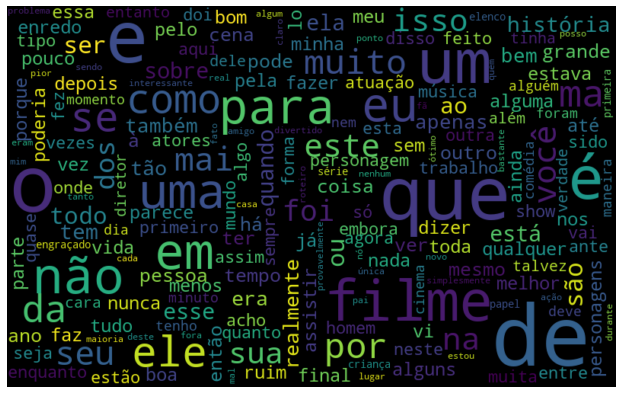

In [17]:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Wordcloud para comentários positivos

In [18]:
datapos = data[data['sentiment'] == 1]
wordcloudpos = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in datapos.text_pt]))

(-0.5, 799.5, 499.5, -0.5)

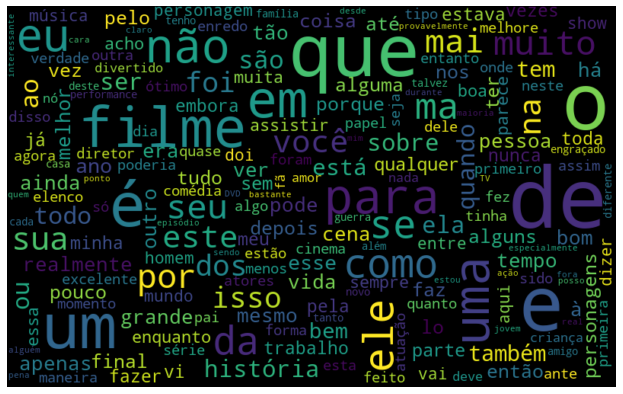

In [19]:
plt.figure(figsize=(12,7))
plt.imshow(wordcloudpos, interpolation='bilinear')
plt.axis("off")

Wordcloud para comentários negativos

In [20]:
dataneg = data[data['sentiment'] == 0]
wordcloudneg = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in dataneg.text_pt]))

(-0.5, 799.5, 499.5, -0.5)

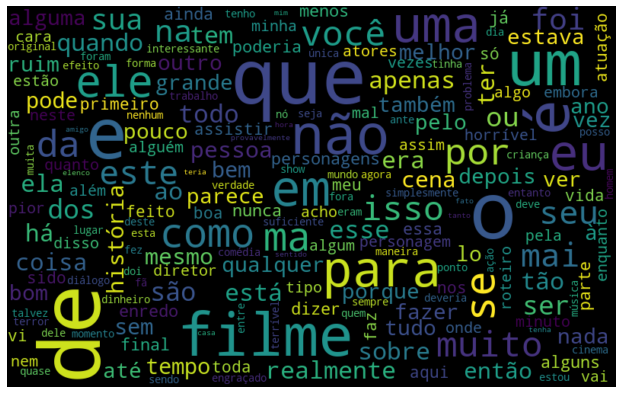

In [21]:
plt.figure(figsize=(12,7))
plt.imshow(wordcloudneg, interpolation='bilinear')
plt.axis("off")

Percebe-se com a visuzaliação da world cloud que nos dois cenários fica difícil a análise de palavras que influenciam devido a grande frequência de palavras chamadas de stop words, devido a isso é interessante um meio de visualizar a frequência de palavras nesse conjunto de dados.

Utilizando o NLTK

In [22]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [23]:
#gerando tokens utilizando nltk
from nltk import tokenize
tokenizer  = tokenize.WhitespaceTokenizer()
tokenized = tokenizer.tokenize(' '.join([text for text in data.text_pt]))

In [24]:
tokenized[:5]

['Mais', 'uma', 'vez,', 'o', 'Sr.']

Utilizando os tokens para gerar um dicionário de frequências

In [25]:
#freqdist gera um dicionario com cada token e sua frequência
freqdist = nltk.FreqDist(tokenized)

In [26]:
freqdist

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [27]:
#criando dataset com a palavra e sua frequencia
df = pd.DataFrame({'word': list(freqdist.keys()), 'frequency': list(freqdist.values())})

In [28]:
df

,word,frequency
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [29]:
#pegando apenas as 20 palavras que mais aparecem
df20largest = df.nlargest(20, columns = 'frequency')

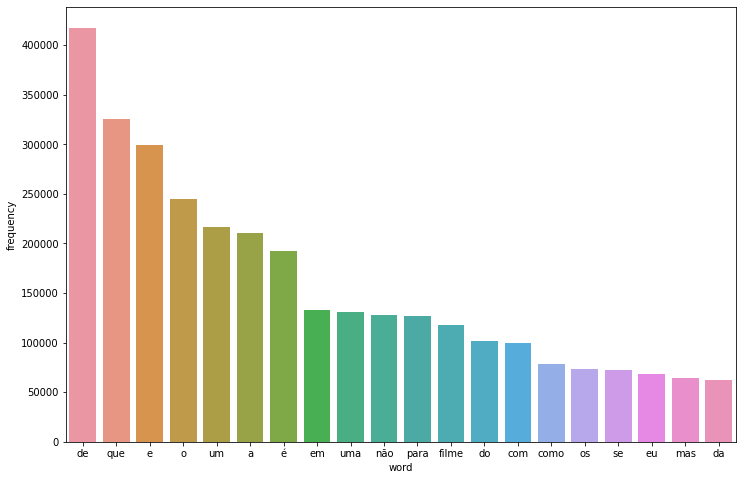

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x = df20largest.word, y = df20largest.frequency)

Removendo as Stop Words

In [31]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [32]:
data['text_pt'] = data['text_pt'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

Plotando as 20 palavras mais frequentes após a remoção das stopwords

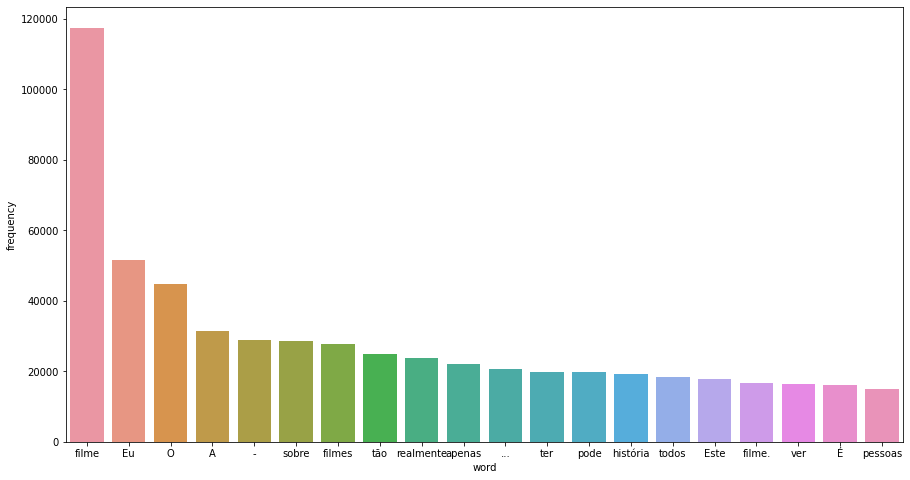

In [33]:
tokenized = tokenizer.tokenize(' '.join([text for text in data.text_pt]))
freqdist = nltk.FreqDist(tokenized)
df = pd.DataFrame({'word': list(freqdist.keys()), 'frequency': list(freqdist.values())})
df20largest = df.nlargest(20, columns = 'frequency')
plt.figure(figsize=(15,8))
sns.barplot(x = df20largest.word, y = df20largest.frequency)

(-0.5, 799.5, 499.5, -0.5)

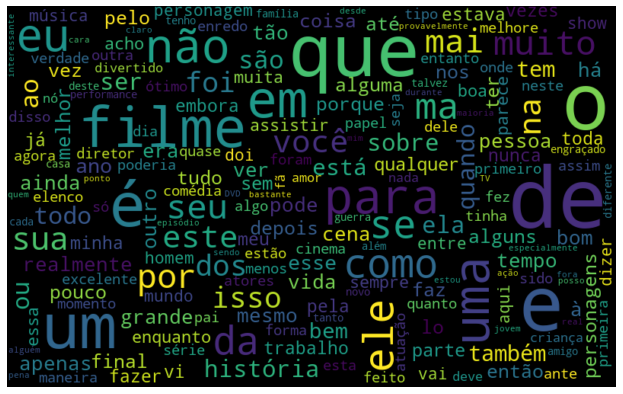

In [34]:
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(' '.join([text for text in data.text_pt]))
plt.figure(figsize=(12,7))
plt.imshow(wordcloudpos, interpolation='bilinear')
plt.axis("off")

Testando o modelo sem as stopwords

In [35]:
bow = cv.fit_transform(data['text_pt'])
bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=cv.get_feature_names_out())
x_train, x_test, y_train, y_test = train_test_split(bow, data.sentiment, random_state = 42)
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8824100283057016

Destruindo a frase

In [36]:
!pip install cereja
import cereja as cj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
🍒 Using Cereja v.1.7.8


In [37]:
#stemmando as palavras do dataset
stemmer = nltk.stem.RSLPStemmer()

#data['text_pt']= data['text_pt'].apply((lambda x: [stemmer.stem(y) for y in x]))

In [38]:
data['text_pt']

0        Mais vez, Sr. Costner arrumou filme tempo nece...
1        Este exemplo motivo maioria filmes ação mesmos...
2        Primeiro tudo odeio raps imbecis, poderiam agi...
3        Nem Beatles puderam escrever músicas todos gos...
4        Filmes fotos latão palavra apropriada eles, ve...
                               ...                        
49454    Como média votos baixa, fato funcionário locad...
49455    O enredo algumas reviravoltas infelizes inacre...
49456    Estou espantado forma filme maioria outros méd...
49457    A Christmas Together realmente veio antes temp...
49458    O drama romântico classe trabalhadora diretor ...
Name: text_pt, Length: 49459, dtype: object

In [39]:
#destruindo a frase (removendo pontuação, deixando em minúsculo, removendo stopwords e removendo acentuação)
preprocessor = cj.Preprocessor(stop_words=(stopwords),
                               punctuation='!?,.', to_lower=True, is_remove_punctuation=True,
                               is_remove_stop_words=True, is_remove_accent = True)

data['text_pt']= data['text_pt'].apply(preprocessor.preprocess)

In [40]:
data

,text_pt,sentiment
0,vez sr costner arrumou filme tempo necessario ...,0
1,exemplo motivo maioria filmes acao mesmos gene...,0
2,primeiro tudo odeio raps imbecis poderiam agir...,0
3,beatles puderam escrever musicas todos gostass...,0
4,filmes fotos latao palavra apropriada verdade ...,0
...,...,...
49454,media votos baixa fato funcionario locadora ac...,1
49455,enredo algumas reviravoltas infelizes inacredi...,1
49456,espantado forma filme maioria outros media 5 e...,1
49457,christmas together realmente veio antes tempo ...,1


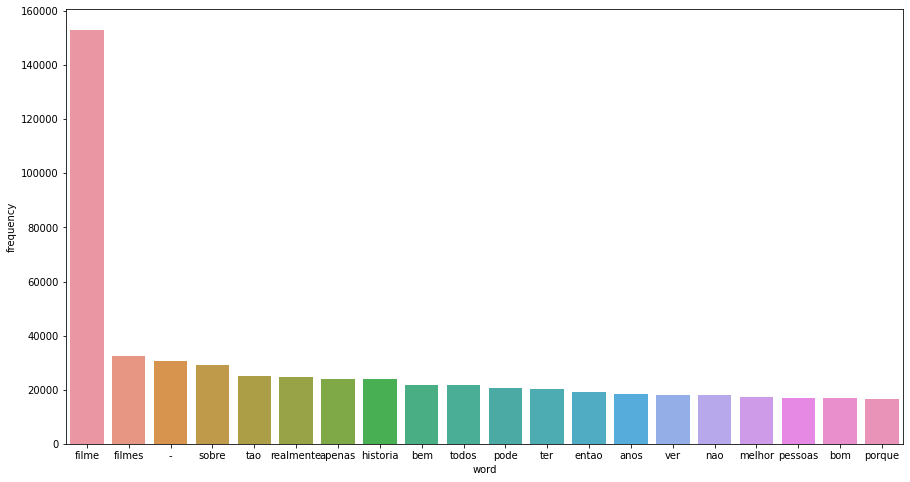

In [41]:
#visualizando a frequencia após os pre-processamentos
tokenized = tokenizer.tokenize(' '.join([text for text in data.text_pt]))
freqdist = nltk.FreqDist(tokenized)
df = pd.DataFrame({'word': list(freqdist.keys()), 'frequency': list(freqdist.values())})
df20largest = df.nlargest(20, columns = 'frequency')
plt.figure(figsize=(15,8))
sns.barplot(x = df20largest.word, y = df20largest.frequency)

In [42]:
#testando o modelo de regressão logistica com as alterações
bow = cv.fit_transform(data['text_pt'])
bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=cv.get_feature_names_out())
x_train, x_test, y_train, y_test = train_test_split(bow, data.sentiment, random_state = 42)
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8862110796603316

Trocando a vetorização de bag of words para TF-IDF (Term frequency - inverse document frequency)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase = False, max_features = 5000)

features = tfidf.fit_transform(data['text_pt'])

features = pd.DataFrame(features.todense(), columns = tfidf.get_feature_names())

features

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,100,1010,11,110,12,13,14,15,16,...,world,wow,xerife,york,you,young,zero,zombie,zumbi,zumbis
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.085474,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49456,0.051016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49457,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
x_train, x_test, y_train, y_test = train_test_split(features, data.sentiment, random_state = 42)
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8832996360695512

Utilizando n-grams

In [52]:
tfidf_ngram = TfidfVectorizer(lowercase = False,max_features = 5000, ngram_range =  (1,2))
features_ngram = tfidf_ngram.fit_transform(data['text_pt'])
features_ngram = pd.DataFrame(features_ngram.todense(), columns = tfidf_ngram.get_feature_names())
features_ngram

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,10 10,10 anos,10 minutos,100,1010,11,110,12,12 anos,...,woody,world,xerife,york,you,young,zero,zombie,zumbi,zumbis
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.090532,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49456,0.050796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
49457,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:

x_train, x_test, y_train, y_test = train_test_split(features_ngram, data.sentiment, random_state = 42)
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr.score(x_test,y_test)

0.8837040032349374